In [1]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform

### ZA_vs_SynZB

In [60]:
traj = md.load('ZA_vs_SynZB_subsampled.xtc',top='../report2/nvt_ZA_vs_SynZB_new.gro')
print(traj)

<mdtraj.Trajectory with 201 frames, 1326 atoms, 76 residues, and unitcells>


In [29]:
protein1_residues = traj.topology.select('resid 0 to 46 and name CA')
protein2_residues = traj.topology.select('resid 47 to 75 and name CA')

distances = md.compute_distances(traj, atom_pairs=[(i, j) for i in protein1_residues for j in protein2_residues])

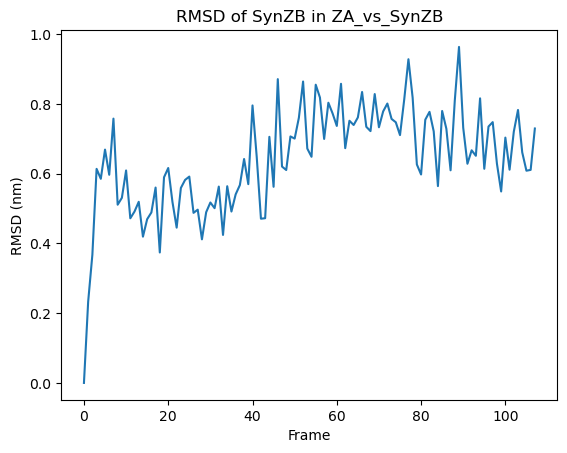

In [23]:
rmsd_protein1 = md.rmsd(traj, traj, 0, atom_indices=protein1_residues)
plt.plot(rmsd_protein1)
plt.xlabel('Frame')
plt.ylabel('RMSD (nm)')
plt.title('RMSD of SynZB in ZA_vs_SynZB')
plt.savefig('RMSD/RMSD_ZA_vs_SynZB.png')
plt.show()

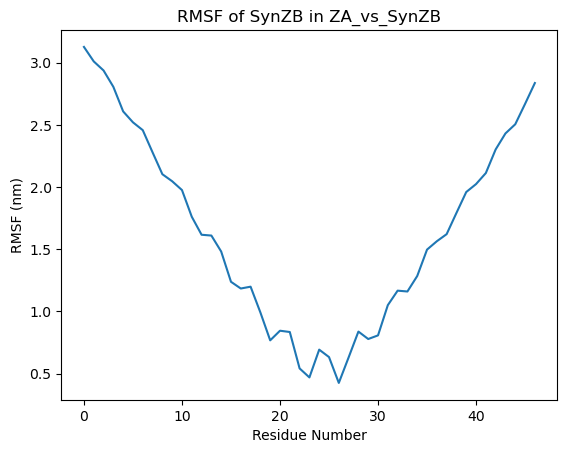

In [13]:
protein1_residues = traj.topology.select('resid 0 to 46 and name CA')
rmsf_protein1 = np.sqrt(3*np.mean((traj.xyz[:, protein1_residues, :] - np.mean(traj.xyz[:, protein1_residues, :], axis=0))**2, axis=(0,2)))
residue_indices_protein1 = [residue.index for residue in traj.topology.residues if residue.index >= 0 and residue.index <= 46]
plt.plot(residue_indices_protein1, rmsf_protein1)
plt.xlabel('Residue Number')
plt.ylabel('RMSF (nm)')
plt.title('RMSF of SynZB in ZA_vs_SynZB')
plt.savefig('RMSF/RMSF_ZA_vs_SynZB.png')
plt.show()

In [30]:
protein1_atoms = traj.topology.select('resid 0 to 46')
protein1_traj = traj.atom_slice(protein1_atoms)

hbonds = md.baker_hubbard(protein1_traj, freq=0.1)  # Only considering bonds that exist >10% of the time

num_hbonds = len(hbonds)
print(f"Total number of intramolecular hydrogen bonds in protein1: {num_hbonds}")

Total number of intramolecular hydrogen bonds in protein1: 57


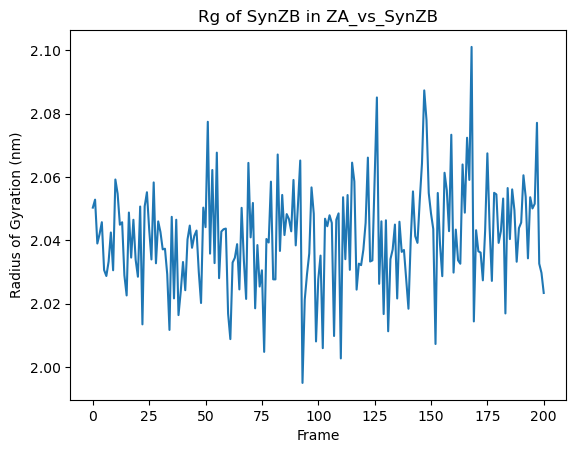

In [39]:
protein1_atoms = traj.topology.select('resid 0 to 46')
protein1_traj = traj.atom_slice(protein1_atoms)

Rg_protein1 = md.compute_rg(protein1_traj)
plt.plot(Rg_protein1)

plt.xlabel('Frame')
plt.ylabel('Radius of Gyration (nm)')
plt.title('Rg of SynZB in ZA_vs_SynZB')
plt.savefig('Rg/Rg_ZA_vs_SynZB.png')
plt.show()

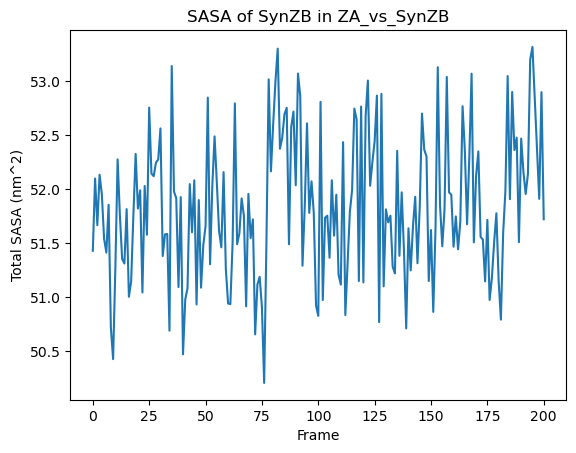

In [53]:
protein1_atoms = traj.topology.select('resid 0 to 46')
protein1_traj = traj.atom_slice(protein1_atoms)
sasa_protein1 = md.shrake_rupley(protein1_traj, mode='residue')
total_sasa_protein1 = sasa_protein1.sum(axis=1)
plt.plot(total_sasa_protein1)
plt.xlabel('Frame')
plt.ylabel('Total SASA (nm^2)')
plt.title('SASA of SynZB in ZA_vs_SynZB')
plt.savefig('SARA/SARA_ZA_vs_SynZB.png')
plt.show()

In [64]:
protein1_atoms = traj.topology.select('resid 0 to 46')
protein1_traj = traj.atom_slice(protein1_atoms)
dssp_result = md.compute_dssp(protein1_traj, simplified=True)

total_frames, total_residues = dssp_result.shape
counts = {"H": 0, "E": 0, "C": 0}
for frame in dssp_result:
    for assignment in frame:
        counts[assignment] += 1

# Convert counts to portions/percentages
portions = {structure: (count / (total_frames * total_residues)) * 100 for structure, count in counts.items()}

# Print the portions
for structure, portion in portions.items():
    print(f"Percentage of {structure}: {portion:.2f}%")

Percentage of H: 91.67%
Percentage of E: 0.00%
Percentage of C: 8.33%


In [4]:
threshold = 0.5
contacts = distances < threshold

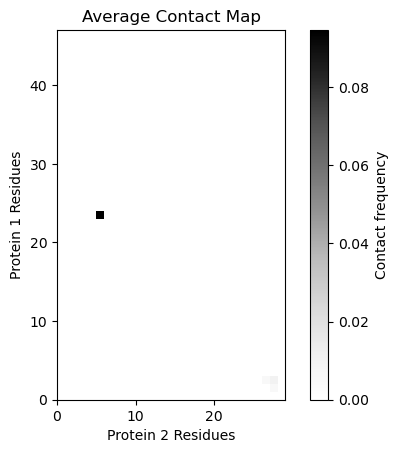

In [14]:
import numpy as np
import matplotlib.pyplot as plt

avg_contacts = contacts.mean(axis=0).reshape(len(protein1_residues), len(protein2_residues))

plt.imshow(avg_contacts, cmap='Greys', origin='upper', extent=(0, len(protein2_residues), 0, len(protein1_residues)))
plt.colorbar(label='Contact frequency')
plt.xlabel('Protein 2 Residues')
plt.ylabel('Protein 1 Residues')
plt.title('Average Contact Map')
plt.savefig('contactmap_ZA_vs_SynZB.png')
plt.show()

In [6]:
np.nonzero(avg_contacts)

(array([23, 44, 44, 45]), array([ 5, 26, 27, 27]))

In [16]:
protein2_residues[5]

912

### SynZB_vs_Synzip2

In [65]:
traj = md.load('SynZB_vs_Synzip2_subsampled.xtc',top='../report2/nvt_SynZB_vs_Synzip2_new.gro')
print(traj)

<mdtraj.Trajectory with 201 frames, 1673 atoms, 97 residues, and unitcells>


In [21]:
protein1_residues = traj.topology.select('resid 0 to 46 and name CA')
protein2_residues = traj.topology.select('resid 47 to 96 and name CA')

distances = md.compute_distances(traj, atom_pairs=[(i, j) for i in protein1_residues for j in protein2_residues])

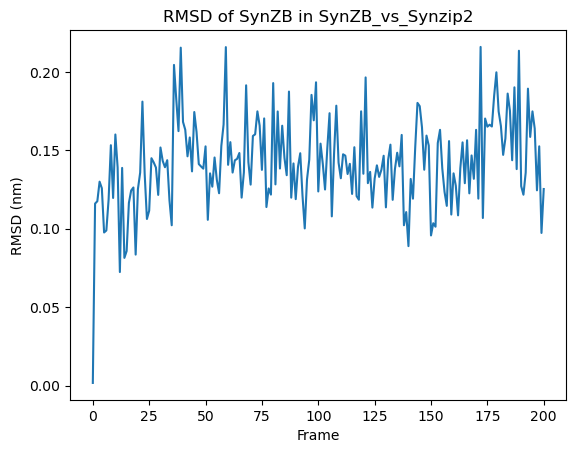

In [27]:
rmsd_protein1 = md.rmsd(traj, traj, 0, atom_indices=protein1_residues)
plt.plot(rmsd_protein1)
plt.xlabel('Frame')
plt.ylabel('RMSD (nm)')
plt.title('RMSD of SynZB in SynZB_vs_Synzip2')
plt.savefig('RMSD/RMSD_SynZB_vs_Synzip2.png')
plt.show()

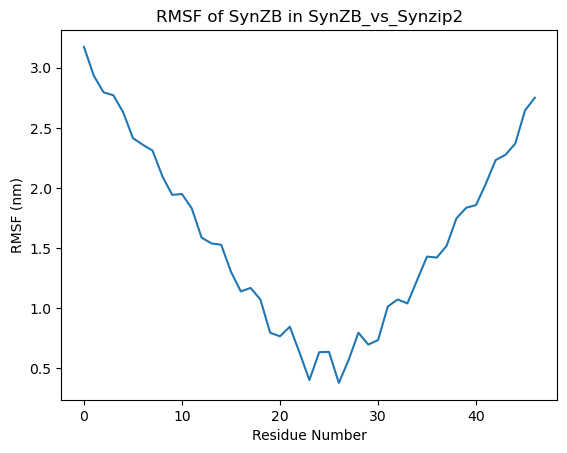

In [22]:
protein1_residues = traj.topology.select('resid 0 to 46 and name CA')
rmsf_protein1 = np.sqrt(3*np.mean((traj.xyz[:, protein1_residues, :] - np.mean(traj.xyz[:, protein1_residues, :], axis=0))**2, axis=(0,2)))
residue_indices_protein1 = [residue.index for residue in traj.topology.residues if residue.index >= 0 and residue.index <= 46]
plt.plot(residue_indices_protein1, rmsf_protein1)
plt.xlabel('Residue Number')
plt.ylabel('RMSF (nm)')
plt.title('RMSF of SynZB in SynZB_vs_Synzip2')
plt.savefig('RMSF/RMSF_SynZB_vs_Synzip2.png')
plt.show()

In [32]:
protein1_atoms = traj.topology.select('resid 0 to 46')
protein1_traj = traj.atom_slice(protein1_atoms)

hbonds = md.baker_hubbard(protein1_traj, freq=0.1)  # Only considering bonds that exist >10% of the time

num_hbonds = len(hbonds)
print(f"Total number of intramolecular hydrogen bonds in protein1: {num_hbonds}")

Total number of intramolecular hydrogen bonds in protein1: 50


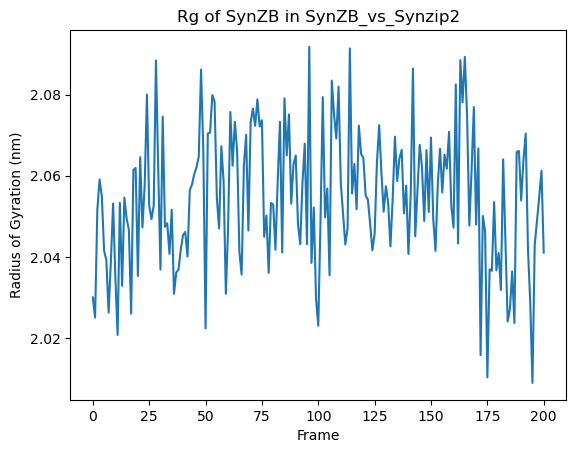

In [50]:
protein1_atoms = traj.topology.select('resid 0 to 46')
protein1_traj = traj.atom_slice(protein1_atoms)

Rg_protein1 = md.compute_rg(protein1_traj)
plt.plot(Rg_protein1)

plt.xlabel('Frame')
plt.ylabel('Radius of Gyration (nm)')
plt.title('Rg of SynZB in SynZB_vs_Synzip2')
plt.savefig('Rg/Rg_SynZB_vs_Synzip2.png')
plt.show()

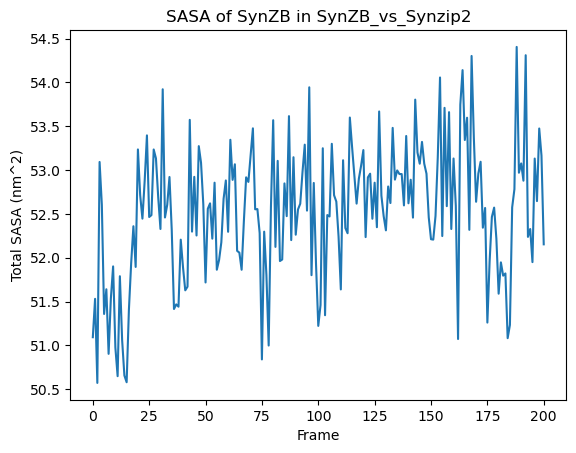

In [55]:
protein1_atoms = traj.topology.select('resid 0 to 46')
protein1_traj = traj.atom_slice(protein1_atoms)
sasa_protein1 = md.shrake_rupley(protein1_traj, mode='residue')
total_sasa_protein1 = sasa_protein1.sum(axis=1)
plt.plot(total_sasa_protein1)
plt.xlabel('Frame')
plt.ylabel('Total SASA (nm^2)')
plt.title('SASA of SynZB in SynZB_vs_Synzip2')
plt.savefig('SARA/SARA_SynZB_vs_Synzip2.png')
plt.show()

In [66]:
protein1_atoms = traj.topology.select('resid 0 to 46')
protein1_traj = traj.atom_slice(protein1_atoms)
dssp_result = md.compute_dssp(protein1_traj, simplified=True)

total_frames, total_residues = dssp_result.shape
counts = {"H": 0, "E": 0, "C": 0}
for frame in dssp_result:
    for assignment in frame:
        counts[assignment] += 1

# Convert counts to portions/percentages
portions = {structure: (count / (total_frames * total_residues)) * 100 for structure, count in counts.items()}

# Print the portions
for structure, portion in portions.items():
    print(f"Percentage of {structure}: {portion:.2f}%")

Percentage of H: 89.86%
Percentage of E: 0.00%
Percentage of C: 10.14%


In [14]:
threshold = 0.5
contacts = distances < threshold

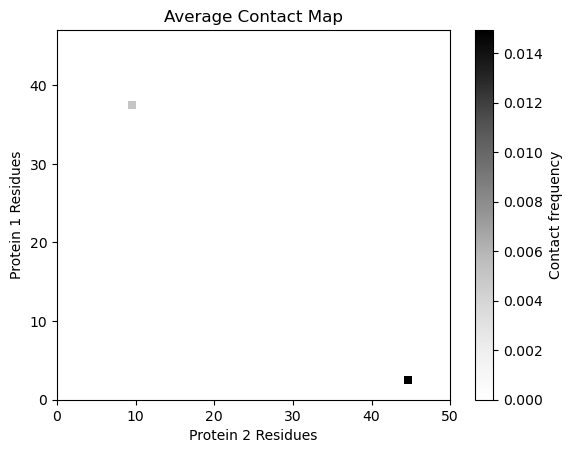

In [15]:
import numpy as np
import matplotlib.pyplot as plt

avg_contacts = contacts.mean(axis=0).reshape(len(protein1_residues), len(protein2_residues))

plt.imshow(avg_contacts, cmap='Greys', origin='upper', extent=(0, len(protein2_residues), 0, len(protein1_residues)))
plt.colorbar(label='Contact frequency')
plt.xlabel('Protein 2 Residues')
plt.ylabel('Protein 1 Residues')
plt.title('Average Contact Map')
plt.savefig('contactmap_SynZB_vs_Synzip2.png')
plt.show()

In [16]:
np.nonzero(avg_contacts)

(array([ 9, 44]), array([ 9, 44]))

In [20]:
avg_contacts[9,9]

0.004975124378109453

In [10]:
protein2_residues[44]

1588

### ZA_vs_SynZB_vs_Synzip2

In [67]:
traj = md.load('ZA_vs_SynZB_vs_Synzip2_subsampled.xtc',top='../report/md_0_1_ZA_vs_SynZB_vs_Synzip2_new.gro')
print(traj)

<mdtraj.Trajectory with 101 frames, 2179 atoms, 126 residues, and unitcells>


In [24]:
protein1_residues = traj.topology.select('resid 0 to 46 and name CA')
protein2_residues = traj.topology.select('resid 47 to 75 and name CA')
protein3_residues = traj.topology.select('resid 76 to 125 and name CA')

distances1 = md.compute_distances(traj, atom_pairs=[(i, j) for i in protein1_residues for j in protein2_residues])
distances2 = md.compute_distances(traj, atom_pairs=[(i, j) for i in protein1_residues for j in protein3_residues])

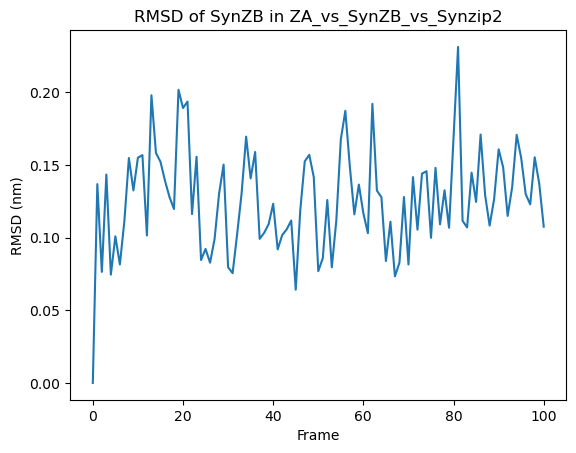

In [32]:
rmsd_protein1 = md.rmsd(traj, traj, 0, atom_indices=protein1_residues)
plt.plot(rmsd_protein1)
plt.xlabel('Frame')
plt.ylabel('RMSD (nm)')
plt.title('RMSD of SynZB in ZA_vs_SynZB_vs_Synzip2')
plt.savefig('RMSD/RMSD_ZA_vs_SynZB_vs_Synzip2.png')
plt.show()

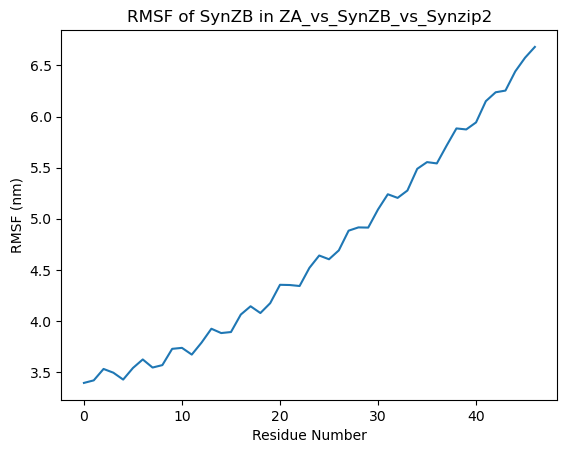

In [25]:
protein1_residues = traj.topology.select('resid 0 to 46 and name CA')
rmsf_protein1 = np.sqrt(3*np.mean((traj.xyz[:, protein1_residues, :] - np.mean(traj.xyz[:, protein1_residues, :], axis=0))**2, axis=(0,2)))
residue_indices_protein1 = [residue.index for residue in traj.topology.residues if residue.index >= 0 and residue.index <= 46]
plt.plot(residue_indices_protein1, rmsf_protein1)
plt.xlabel('Residue Number')
plt.ylabel('RMSF (nm)')
plt.title('RMSF of SynZB in ZA_vs_SynZB_vs_Synzip2')
plt.savefig('RMSF/RMSF_ZA_vs_SynZB_vs_Synzip2.png')
plt.show()

In [34]:
protein1_atoms = traj.topology.select('resid 0 to 46')
protein1_traj = traj.atom_slice(protein1_atoms)

hbonds = md.baker_hubbard(protein1_traj, freq=0.1)  # Only considering bonds that exist >10% of the time

num_hbonds = len(hbonds)
print(f"Total number of intramolecular hydrogen bonds in protein1: {num_hbonds}")

Total number of intramolecular hydrogen bonds in protein1: 51


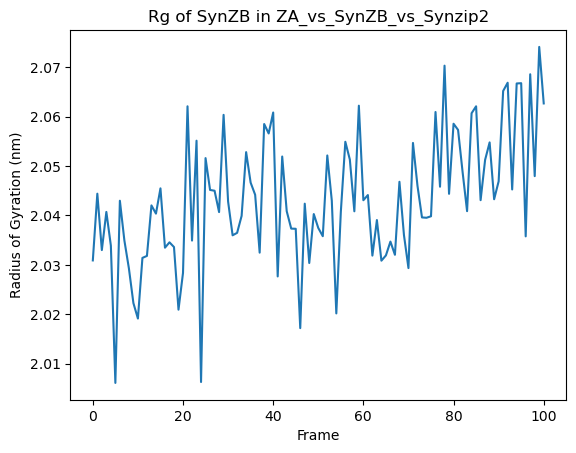

In [48]:
protein1_atoms = traj.topology.select('resid 0 to 46')
protein1_traj = traj.atom_slice(protein1_atoms)

Rg_protein1 = md.compute_rg(protein1_traj)
plt.plot(Rg_protein1)

plt.xlabel('Frame')
plt.ylabel('Radius of Gyration (nm)')
plt.title('Rg of SynZB in ZA_vs_SynZB_vs_Synzip2')
plt.savefig('Rg/Rg_ZA_vs_SynZB_vs_Synzip2.png')
plt.show()

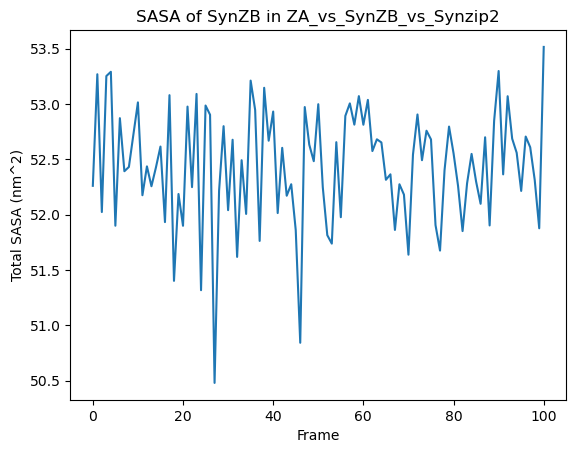

In [57]:
protein1_atoms = traj.topology.select('resid 0 to 46')
protein1_traj = traj.atom_slice(protein1_atoms)
sasa_protein1 = md.shrake_rupley(protein1_traj, mode='residue')
total_sasa_protein1 = sasa_protein1.sum(axis=1)
plt.plot(total_sasa_protein1)
plt.xlabel('Frame')
plt.ylabel('Total SASA (nm^2)')
plt.title('SASA of SynZB in ZA_vs_SynZB_vs_Synzip2')
plt.savefig('SARA/SARA_ZA_vs_SynZB_vs_Synzip2.png')
plt.show()

In [68]:
protein1_atoms = traj.topology.select('resid 0 to 46')
protein1_traj = traj.atom_slice(protein1_atoms)
dssp_result = md.compute_dssp(protein1_traj, simplified=True)

total_frames, total_residues = dssp_result.shape
counts = {"H": 0, "E": 0, "C": 0}
for frame in dssp_result:
    for assignment in frame:
        counts[assignment] += 1

# Convert counts to portions/percentages
portions = {structure: (count / (total_frames * total_residues)) * 100 for structure, count in counts.items()}

# Print the portions
for structure, portion in portions.items():
    print(f"Percentage of {structure}: {portion:.2f}%")

Percentage of H: 92.27%
Percentage of E: 0.00%
Percentage of C: 7.73%


In [32]:
threshold = 0.54
contacts1 = distances1 < threshold
contacts2 = distances2 < threshold

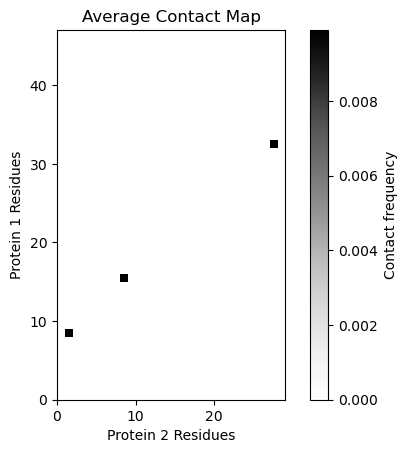

In [33]:
avg_contacts1 = contacts1.mean(axis=0).reshape(len(protein1_residues), len(protein2_residues))

plt.imshow(avg_contacts1, cmap='Greys', origin='upper', extent=(0, len(protein2_residues), 0, len(protein1_residues)))
plt.colorbar(label='Contact frequency')
plt.xlabel('Protein 2 Residues')
plt.ylabel('Protein 1 Residues')
plt.title('Average Contact Map')
plt.savefig('contactmap_ZA_vs_SynZB_vs_Synzip2A.png')
plt.show()

In [34]:
np.nonzero(avg_contacts1)

(array([14, 31, 38]), array([27,  8,  1]))

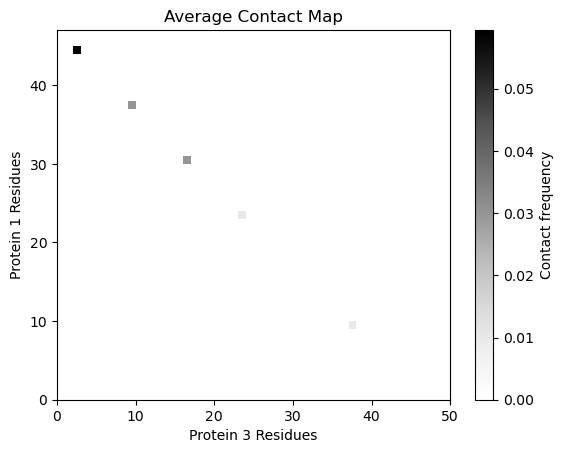

In [35]:
avg_contacts2 = contacts2.mean(axis=0).reshape(len(protein1_residues), len(protein3_residues))

plt.imshow(avg_contacts2, cmap='Greys', origin='upper', extent=(0, len(protein3_residues), 0, len(protein1_residues)))
plt.colorbar(label='Contact frequency')
plt.xlabel('Protein 3 Residues')
plt.ylabel('Protein 1 Residues')
plt.title('Average Contact Map')
plt.savefig('contactmap_ZA_vs_SynZB_vs_Synzip2B.png')
plt.show()

In [36]:
np.nonzero(avg_contacts2)

(array([ 2,  9, 16, 23, 37]), array([ 2,  9, 16, 23, 37]))

In [37]:
avg_contacts2[16,16]

0.0297029702970297

### SynZB

In [69]:
traj = md.load('SynZB_subsampled.xtc',top='../report2/nvt_SynZB_new.gro')
print(traj)

<mdtraj.Trajectory with 108 frames, 820 atoms, 47 residues, and unitcells>


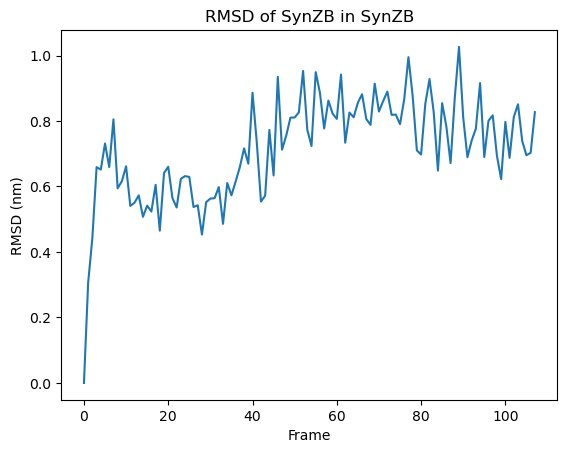

In [34]:
reference = traj[0]

# Compute RMSD to the reference for every frame
rmsd = md.rmsd(traj, reference)

# Plot the RMSD
plt.plot(rmsd)
plt.xlabel('Frame')
plt.ylabel('RMSD (nm)')
plt.title('RMSD of SynZB in SynZB')
plt.savefig('RMSD/RMSD_SynZB.png')
plt.show()

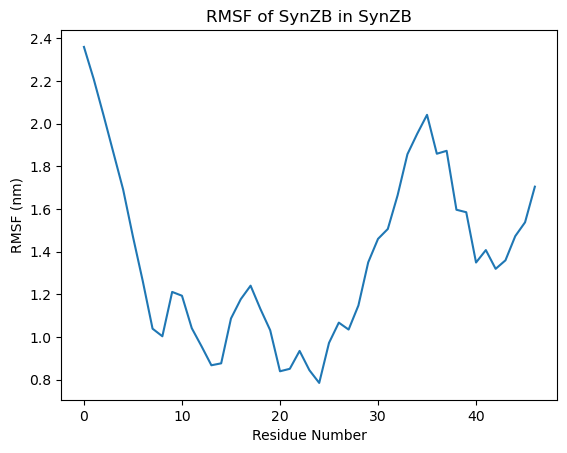

In [27]:
protein1_residues = traj.topology.select('resid 0 to 46 and name CA')
rmsf_protein1 = np.sqrt(3*np.mean((traj.xyz[:, protein1_residues, :] - np.mean(traj.xyz[:, protein1_residues, :], axis=0))**2, axis=(0,2)))
residue_indices_protein1 = [residue.index for residue in traj.topology.residues if residue.index >= 0 and residue.index <= 46]
plt.plot(residue_indices_protein1, rmsf_protein1)
plt.xlabel('Residue Number')
plt.ylabel('RMSF (nm)')
plt.title('RMSF of SynZB in SynZB')
plt.savefig('RMSF/RMSF_SynZB.png')
plt.show()

In [36]:
protein1_atoms = traj.topology.select('resid 0 to 46')
protein1_traj = traj.atom_slice(protein1_atoms)

hbonds = md.baker_hubbard(protein1_traj, freq=0.1)  # Only considering bonds that exist >10% of the time

num_hbonds = len(hbonds)
print(f"Total number of intramolecular hydrogen bonds in protein1: {num_hbonds}")

Total number of intramolecular hydrogen bonds in protein1: 42


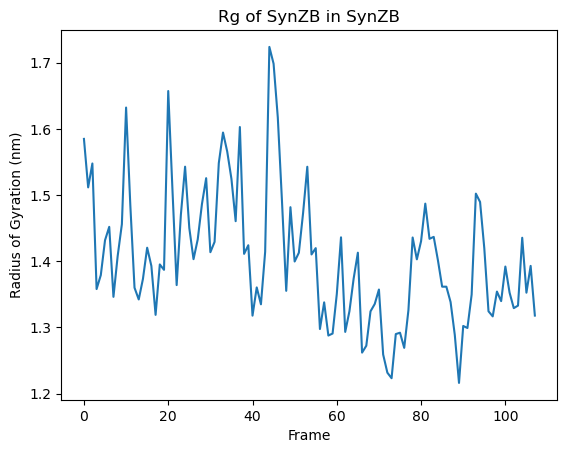

In [46]:
protein1_atoms = traj.topology.select('resid 0 to 46')
protein1_traj = traj.atom_slice(protein1_atoms)

Rg_protein1 = md.compute_rg(protein1_traj)
plt.plot(Rg_protein1)

plt.xlabel('Frame')
plt.ylabel('Radius of Gyration (nm)')
plt.title('Rg of SynZB in SynZB')
plt.savefig('Rg/Rg_SynZB.png')
plt.show()

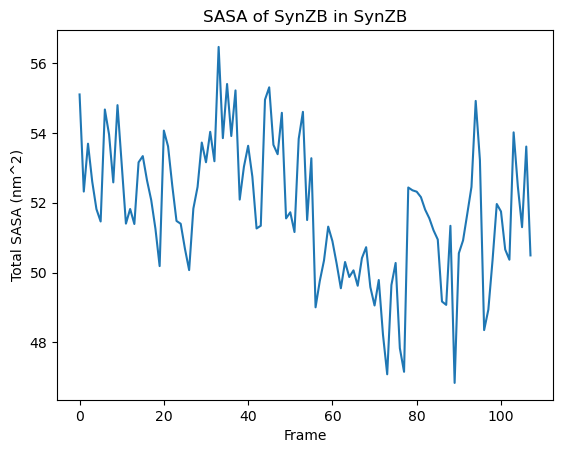

In [59]:
protein1_atoms = traj.topology.select('resid 0 to 46')
protein1_traj = traj.atom_slice(protein1_atoms)
sasa_protein1 = md.shrake_rupley(protein1_traj, mode='residue')
total_sasa_protein1 = sasa_protein1.sum(axis=1)
plt.plot(total_sasa_protein1)
plt.xlabel('Frame')
plt.ylabel('Total SASA (nm^2)')
plt.title('SASA of SynZB in SynZB')
plt.savefig('SARA/SARA_SynZB.png')
plt.show()

In [70]:
protein1_atoms = traj.topology.select('resid 0 to 46')
protein1_traj = traj.atom_slice(protein1_atoms)
dssp_result = md.compute_dssp(protein1_traj, simplified=True)

total_frames, total_residues = dssp_result.shape
counts = {"H": 0, "E": 0, "C": 0}
for frame in dssp_result:
    for assignment in frame:
        counts[assignment] += 1

# Convert counts to portions/percentages
portions = {structure: (count / (total_frames * total_residues)) * 100 for structure, count in counts.items()}

# Print the portions
for structure, portion in portions.items():
    print(f"Percentage of {structure}: {portion:.2f}%")

Percentage of H: 40.11%
Percentage of E: 0.20%
Percentage of C: 59.69%
